In [1]:
# importing all required packages 

import sys
import time
import cv2
import numpy as np
import tensorflow as tf
import os
import zipfile

from matplotlib import pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications  import VGG19, ResNet50, InceptionV3



C:\Users\jaeha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jaeha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jaeha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jaeha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# extracting all filenames iteratively from brain_tumor_dataset folder
base_path = 'brain_tumor_dataset'
categories = ['yes', 'no']

# loading file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:4]) #examples of file names

number of images for each category: [155, 98]
[['brain_tumor_dataset\\yes\\Y1.jpg', 'brain_tumor_dataset\\yes\\Y10.jpg', 'brain_tumor_dataset\\yes\\Y100.JPG', 'brain_tumor_dataset\\yes\\Y101.jpg', 'brain_tumor_dataset\\yes\\Y102.jpg', 'brain_tumor_dataset\\yes\\Y103.jpg', 'brain_tumor_dataset\\yes\\Y104.jpg', 'brain_tumor_dataset\\yes\\Y105.jpg', 'brain_tumor_dataset\\yes\\Y106.jpg', 'brain_tumor_dataset\\yes\\Y107.jpg', 'brain_tumor_dataset\\yes\\Y108.jpg', 'brain_tumor_dataset\\yes\\Y109.JPG', 'brain_tumor_dataset\\yes\\Y11.jpg', 'brain_tumor_dataset\\yes\\Y111.JPG', 'brain_tumor_dataset\\yes\\Y112.JPG', 'brain_tumor_dataset\\yes\\Y113.JPG', 'brain_tumor_dataset\\yes\\Y114.JPG', 'brain_tumor_dataset\\yes\\Y115.JPG', 'brain_tumor_dataset\\yes\\Y116.JPG', 'brain_tumor_dataset\\yes\\Y117.JPG', 'brain_tumor_dataset\\yes\\Y12.jpg', 'brain_tumor_dataset\\yes\\Y120.JPG', 'brain_tumor_dataset\\yes\\Y13.jpg', 'brain_tumor_dataset\\yes\\Y14.jpg', 'brain_tumor_dataset\\yes\\Y146.JPG', 'brain_tu

In [3]:
# exploring the details of the image data using load_img from keras
img = load_img('brain_tumor_dataset/yes/Y26.jpg')

# reporting details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(628, 630)


In [4]:
# importing RHB image, loading to array of shape height, width, channels, then min/max transform.
def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((224,224)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) # min max transformation
        img=img.reshape((224,224,3)) # Create final shape as array with correct dimensions for Keras
        return img

# reading all images from filenames
preprocessed_image_data=list(map(load_image, fnames[0]+fnames[1])) 

# tranforming list to array for Keras
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

print(len(preprocessed_image_data) ) #same number of elements as filenames
print(preprocessed_image_data[0].shape ) #dimensions now 192,192,3 for all images
print(preprocessed_image_data[0].min() ) #min value of every image is zero
print(preprocessed_image_data[0].max() ) #max value of every image is one
X.shape

253
(224, 224, 3)
0.0
1.0


(253, 224, 224, 3)

In [5]:
# creating y data made up of correctly ordered labels from file folders
from itertools import repeat
yes=list(repeat("yes", 155))
no=list(repeat("no", 98))

# combining into single list of y labels
y_labels = yes+no

# checking length, same as X above
print(len(y_labels) )

# one hot encoding

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

253


,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
248,1,0
249,1,0
250,1,0
251,1,0


### Part 1
Visualize brain tumor images that demonstrate when images have tumors and when they do not have tumors.

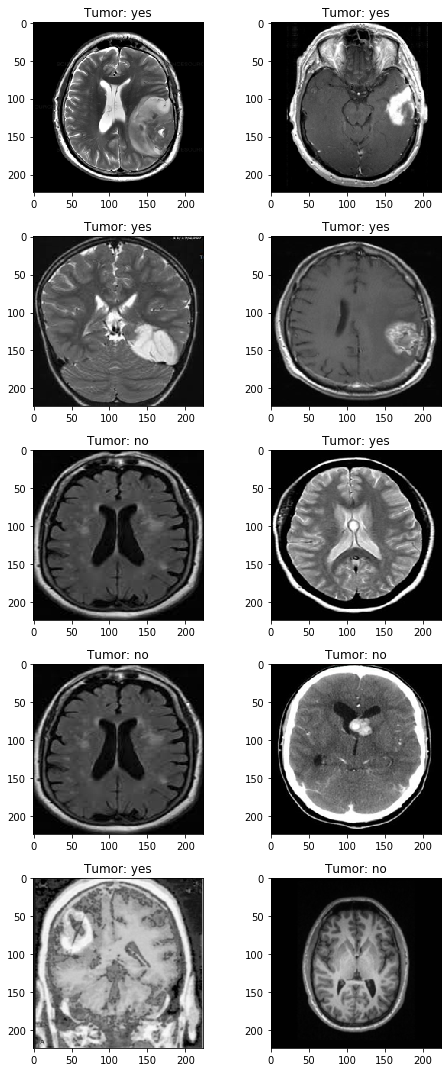

In [12]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(7,15)
for i in range(5):
    for j in range (2):
        l= np.random.randint(0,len(y_labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tumor: '+y_labels[l])
        
plt.tight_layout()

One can see how images with a tumor have a varying shape of a white blob that is growing within the brain, whereas brains without tumor have a symemtric reflection of each side without any indication of an abnormal structure.

### Part 2
Discuss why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.

With accelerated advancements in machine learning, such models can provide substantive help in aiding radiologists or doctors in interpreting MRI scans for a potential sign of brain tumor within a patient. In other words, they can improve the accuracy of diagnostic tools or assessments, improve efficiency, and reduce human bias or errors from variety of factors. It is important to point out that these models are not meant to replace the work of radiologists, but provide a second opinion.

### Part 3

Run at least three prediction models to try to predict brain tumor MRI images well. Use transfer learning for at least one of these models. Discuss which models performed better and point out relevant hyper-parameter values for successful models.

In [6]:
# train test split resized images
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


y_train

,no,yes
38,0,1
143,0,1
84,0,1
55,0,1
217,1,0
...,...,...
106,0,1
14,0,1
92,0,1
179,1,0


### Model 1: Vanilla Neural Network Model

In [28]:
# setting a baseline plain vanilla network model to use as a baseline for convnet models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint


with tf.device('/device:GPU:0'):
      opt=SGD(lr=.001)

      model = Sequential()
      model.add(Dense(64,  input_shape=(224, 224, 3), activation='relu'))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(64, activation='relu'))
      model.add(Flatten())
      model.add(Dense(2, activation='softmax'))

      mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
      red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs                                                
      
      # Compile model
      model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

      # Fitting the NN to the Training set
      model.fit(X_train, y_train, epochs = 5, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/5
192/202 [===========================>..] - ETA: 0s - loss: 0.6423 - acc: 0.6250
Epoch 00001: val_acc improved from -inf to 0.52941, saving model to best_model.h5
202/202 [==============================] - 7s 37ms/sample - loss: 0.6386 - acc: 0.6337 - val_loss: 0.6920 - val_acc: 0.5294
Epoch 2/5
192/202 [===========================>..] - ETA: 0s - loss: 0.5822 - acc: 0.7031
Epoch 00002: val_acc improved from 0.52941 to 0.62745, saving model to best_model.h5
202/202 [==============================] - 7s 35ms/sample - loss: 0.5768 - acc: 0.7129 - val_loss: 0.6655 - val_acc: 0.6275
Epoch 3/5
192/202 [===========================>..] - ETA: 0s - loss: 0.5327 - acc: 0.7292
Epoch 00003: val_acc did not improve from 0.62745
202/202 [==============================] - 7s 33ms/sample - loss: 0.5242 - acc: 0.7376 - val_loss: 0.6735 - val_acc: 0.6275
Epoch 4/5
192/202 [===========================>..] - ETA: 0s - loss: 0.4990 - acc: 0.7865
Epoch 

In [29]:
# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes']


In [7]:
# Now we can extract some evaluative metrics to use for model submission

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_evQal = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata



In [30]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.627451,0.58678,0.663636,0.611111,0,0,0,0


### Model 2: Transfer Learning Model using VGG16

In [100]:
# example of loading the vgg16 model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K


# load model new input layer shape.

IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model VGG16
base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [101]:
# Next step: Freeze the weights of the VGG16 model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])


# Fit VGG16 model with frozen imagent weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    mc = ModelCheckpoint('best_model_V2.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 4s - loss: 0.7227 - acc: 0.4479 
Epoch 00001: val_acc improved from -inf to 0.50980, saving model to best_model_V2.h5
202/202 [==============================] - 197s 973ms/sample - loss: 0.7213 - acc: 0.4505 - val_loss: 0.7061 - val_acc: 0.5098
Epoch 2/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6634 - acc: 0.6250 
Epoch 00002: val_acc improved from 0.50980 to 0.52941, saving model to best_model_V2.h5
202/202 [==============================] - 74s 366ms/sample - loss: 0.6574 - acc: 0.6287 - val_loss: 0.7467 - val_acc: 0.5294
Epoch 3/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6468 - acc: 0.6354 
Epoch 00003: val_acc did not improve from 0.52941
202/202 [==============================] - 75s 371ms/sample - loss: 0.6474 - acc: 0.6337 - val_loss: 0.7207 - val_acc: 0.5294
Epoch 4/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6303 

In [102]:
# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


In [103]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.686275,0.664474,0.717181,0.673611,0,0,0,0


### Model 3: Transfer Learning Model using Inception + Resnet

In [57]:
# example of loading the Inception model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K


# load model new input layer shape.

IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model Inception + Resnet
base_model = InceptionResNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.summary() # Notice unfrozen number of trainable parameters

219062272/219055592 [==============================] - 12s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________

__________________________________________________________________________________________________
activation_118 (Activation)     (None, 12, 12, 160)  0           batch_normalization_118[0][0]    
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 12, 12, 192)  208896      block17_10_ac[0][0]              
__________________________________________________________________________________________________
conv2d_119 (Conv2D)             (None, 12, 12, 192)  215040      activation_118[0][0]             
__________________________________________________________________________________________________
batch_normalization_116 (BatchN (None, 12, 12, 192)  576         conv2d_116[0][0]                 
__________________________________________________________________________________________________
batch_normalization_119 (BatchN (None, 12, 12, 192)  576         conv2d_119[0][0]                 
__________

Total params: 54,336,736
Trainable params: 54,276,192
Non-trainable params: 60,544
__________________________________________________________________________________________________


In [58]:
# Next step: Freeze the weights of the model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

  model.fit(X_train, y_train,
          epochs = 25, verbose=1,validation_data=(X_test,y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/25
202/202 [==============================] - 75s 371ms/sample - loss: 0.6236 - acc: 0.6139 - val_loss: 0.5502 - val_acc: 0.7647
Epoch 2/25
202/202 [==============================] - 51s 253ms/sample - loss: 0.5081 - acc: 0.7871 - val_loss: 0.4809 - val_acc: 0.7843
Epoch 3/25
202/202 [==============================] - 51s 255ms/sample - loss: 0.4519 - acc: 0.7723 - val_loss: 0.4734 - val_acc: 0.7843
Epoch 4/25
202/202 [==============================] - 48s 239ms/sample - loss: 0.3873 - acc: 0.8366 - val_loss: 0.6115 - val_acc: 0.7255
Epoch 5/25
202/202 [==============================] - 50s 247ms/sample - loss: 0.3529 - acc: 0.8762 - val_loss: 0.5417 - val_acc: 0.7647
Epoch 6/25
202/202 [==============================] - 52s 256ms/sample - loss: 0.3204 - acc: 0.9059 - val_loss: 0.5132 - val_acc: 0.8039
Epoch 7/25
202/202 [==============================] - 49s 243ms/sample - loss: 0.2841 - acc: 0.9059 - val_loss: 0.6330 - val_acc: 0.7

In [59]:
# using predict_classes() for multi-class data to return predicted class index.
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 0]
['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no']


In [60]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.843137,0.842593,0.859524,0.849537,0,0,0,0


#### Implementing model checkpoint based on validation accuracy score

In [61]:
# Next step: Freeze the weights of the model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    mc = ModelCheckpoint('best_model_V3.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6636 - acc: 0.6250 
Epoch 00001: val_acc improved from -inf to 0.66667, saving model to best_model_V3.h5
202/202 [==============================] - 110s 544ms/sample - loss: 0.6583 - acc: 0.6287 - val_loss: 0.6313 - val_acc: 0.6667
Epoch 2/25
192/202 [===========================>..] - ETA: 2s - loss: 0.5476 - acc: 0.7344
Epoch 00002: val_acc did not improve from 0.66667
202/202 [==============================] - 55s 275ms/sample - loss: 0.5487 - acc: 0.7376 - val_loss: 0.5915 - val_acc: 0.6471
Epoch 3/25
192/202 [===========================>..] - ETA: 2s - loss: 0.4779 - acc: 0.7969
Epoch 00003: val_acc improved from 0.66667 to 0.70588, saving model to best_model_V3.h5
202/202 [==============================] - 53s 261ms/sample - loss: 0.4688 - acc: 0.8069 - val_loss: 0.5208 - val_acc: 0.7059
Epoch 4/25
192/202 [===========================>..] - ETA: 2s - loss: 0.4279 - 

In [62]:
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0]
['yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [63]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.882353,0.881211,0.88558,0.87963,0,0,0,0


#### Loss function changed from categorical crossentropy to binary crossentropy

In [64]:
# Next step: Freeze the weights of the model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    mc = ModelCheckpoint('best_model_V4.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6330 - acc: 0.6094 
Epoch 00001: val_acc improved from -inf to 0.50980, saving model to best_model_V4.h5
202/202 [==============================] - 98s 484ms/sample - loss: 0.6282 - acc: 0.6139 - val_loss: 0.9359 - val_acc: 0.5098
Epoch 2/25
192/202 [===========================>..] - ETA: 1s - loss: 0.5170 - acc: 0.7708
Epoch 00002: val_acc improved from 0.50980 to 0.64706, saving model to best_model_V4.h5
202/202 [==============================] - 46s 226ms/sample - loss: 0.5147 - acc: 0.7723 - val_loss: 0.6025 - val_acc: 0.6471
Epoch 3/25
192/202 [===========================>..] - ETA: 1s - loss: 0.4536 - acc: 0.8542
Epoch 00003: val_acc improved from 0.64706 to 0.72549, saving model to best_model_V4.h5
202/202 [==============================] - 48s 238ms/sample - loss: 0.4563 - acc: 0.8465 - val_loss: 0.5640 - val_acc: 0.7255
Epoch 4/25
192/202 [======================

In [65]:
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0]
['no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no']


In [70]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.901961,0.901961,0.905093,0.905093,0,0,0,0


#### Freezing 75% of the layers

In [75]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune everything up to this layer onwards
freeze_layers_after=195 # chosen 75% of the layers to be frozen

# Freeze all the layers after the `freeze_layers_after` layer
for layer in base_model.layers[freeze_layers_after:]:
  layer.trainable =  False

print("Number of layers frozen in the base model: ", len(base_model.layers)-freeze_layers_after)

Number of layers in the base model:  780
Number of layers frozen in the base model:  585


In [76]:
# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
    mc = ModelCheckpoint('best_model_V5.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6349 - acc: 0.6302 
Epoch 00001: val_acc improved from -inf to 0.66667, saving model to best_model_V5.h5
202/202 [==============================] - 103s 508ms/sample - loss: 0.6373 - acc: 0.6337 - val_loss: 0.7073 - val_acc: 0.6667
Epoch 2/25
192/202 [===========================>..] - ETA: 1s - loss: 0.5250 - acc: 0.8125
Epoch 00002: val_acc improved from 0.66667 to 0.68627, saving model to best_model_V5.h5
202/202 [==============================] - 46s 228ms/sample - loss: 0.5251 - acc: 0.8020 - val_loss: 0.5470 - val_acc: 0.6863
Epoch 3/25
192/202 [===========================>..] - ETA: 1s - loss: 0.4308 - acc: 0.8229
Epoch 00003: val_acc improved from 0.68627 to 0.84314, saving model to best_model_V5.h5
202/202 [==============================] - 48s 238ms/sample - loss: 0.4379 - acc: 0.8168 - val_loss: 0.4318 - val_acc: 0.8431
Epoch 4/25
192/202 [=====================

In [77]:
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0]
['yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [78]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.901961,0.901354,0.90295,0.900463,0,0,0,0


#### Freezing 50% of the layers

In [79]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune everything up to this layer onwards
freeze_layers_after=390 # chosen 50% of the layers to be frozen

# Freeze all the layers after the `freeze_layers_after` layer
for layer in base_model.layers[freeze_layers_after:]:
  layer.trainable =  False

print("Number of layers frozen in the base model: ", len(base_model.layers)-freeze_layers_after)

Number of layers in the base model:  780
Number of layers frozen in the base model:  390


In [80]:
# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
    mc = ModelCheckpoint('best_model_V5.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 2s - loss: 0.7882 - acc: 0.4948 
Epoch 00001: val_acc improved from -inf to 0.52941, saving model to best_model_V5.h5
202/202 [==============================] - 106s 526ms/sample - loss: 0.7786 - acc: 0.5050 - val_loss: 1.7128 - val_acc: 0.5294
Epoch 2/25
192/202 [===========================>..] - ETA: 1s - loss: 0.6589 - acc: 0.6458
Epoch 00002: val_acc improved from 0.52941 to 0.54902, saving model to best_model_V5.h5
202/202 [==============================] - 47s 232ms/sample - loss: 0.6546 - acc: 0.6436 - val_loss: 0.7231 - val_acc: 0.5490
Epoch 3/25
192/202 [===========================>..] - ETA: 1s - loss: 0.5690 - acc: 0.7760
Epoch 00003: val_acc improved from 0.54902 to 0.62745, saving model to best_model_V5.h5
202/202 [==============================] - 46s 225ms/sample - loss: 0.5640 - acc: 0.7822 - val_loss: 0.6323 - val_acc: 0.6275
Epoch 4/25
192/202 [=====================

In [82]:
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [83]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.862745,0.861896,0.863354,0.861111,0,0,0,0


#### Freezing 25% of the layers

In [84]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune everything up to this layer onwards
freeze_layers_after=585 # chosen 25% of the layers to be frozen

# Freeze all the layers after the `freeze_layers_after` layer
for layer in base_model.layers[freeze_layers_after:]:
  layer.trainable =  False

print("Number of layers frozen in the base model: ", len(base_model.layers)-freeze_layers_after)

Number of layers in the base model:  780
Number of layers frozen in the base model:  195


In [85]:
# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
    mc = ModelCheckpoint('best_model_V7.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 2s - loss: 0.6776 - acc: 0.5833 
Epoch 00001: val_acc improved from -inf to 0.56863, saving model to best_model_V7.h5
202/202 [==============================] - 112s 556ms/sample - loss: 0.6786 - acc: 0.5842 - val_loss: 0.9592 - val_acc: 0.5686
Epoch 2/25
192/202 [===========================>..] - ETA: 1s - loss: 0.5490 - acc: 0.7760
Epoch 00002: val_acc improved from 0.56863 to 0.60784, saving model to best_model_V7.h5
202/202 [==============================] - 46s 228ms/sample - loss: 0.5472 - acc: 0.7772 - val_loss: 0.7333 - val_acc: 0.6078
Epoch 3/25
192/202 [===========================>..] - ETA: 1s - loss: 0.4708 - acc: 0.7812
Epoch 00003: val_acc improved from 0.60784 to 0.68627, saving model to best_model_V7.h5
202/202 [==============================] - 47s 233ms/sample - loss: 0.4704 - acc: 0.7772 - val_loss: 0.6267 - val_acc: 0.6863
Epoch 4/25
192/202 [=====================

In [86]:
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
['yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [87]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.862745,0.862534,0.862308,0.863426,0,0,0,0


### Part 3 Model Discussion

Please find the relevant evaluation metric scores of the three models:
<br>
<br>
Model 1 (Vanilla Neural Network Model)
<br>
Accuracy: 0.627451
<br>
F1 Score: 0.58678
<br>
Precision: 0.663636
<br>
Recall: 0.611111
<br>
<br>
Model 2: (Transfer Learning Model using VGG16)
<br>
Accuracy: 0.686275
<br>
F1 Score: 0.664474
<br>
Precision: 0.717181
<br>
Recall: 0.673611
<br>
<br>
Model 3: (Transfer Learning Model using Inception + Resnet, Best Model after Tuning)
<br>
Accuracy: 0.901961
<br>
F1 Score: 0.901961
<br>
Precision: 0.905093
<br>
Recall: 0.905093
<br>
<br>
I started off with a plain vanilla neural network to see how well the model can predict on the test data with limited tuning of its parameters. For my second model, I applied a transfer learning model using VGG16 as the base model, and froze all layers. Even though it produced a better score, it only improved by a marginal extent. As such, given its unpromising results, I did not try to tune its parameters for these two models.
<br>
<br>
However, for my last and final model, I used Inception + Resnet model as the base model for transfer learning. Using the same approach, I initially froze all layers, and selected categorical crossentropy and adam as its loss and optimizer functions, respectively. From this, it produced an impressive accuracy score of 84%. As such, I chose to tune this model, even though it was still computationally demanding and time-consuming.
<br>
<br>
Next, I introduced model checkpoints based on the validation accuracy score. This allow the model to save the best model from each iteration in relation to the maximum validation accuracy score. Using the same configuration, the model improved its accuracy score from 84% to 88%. For the next tuning parameter, I changed the loss function from categorical crossentropy to binary crossentropy, and the model improved from 88% to 90.2%. This was already an impressive score, but I also wanted to tune the number of layers, ranging from 25%, 50% and 7% of the total 780 layers in the base model. When 75% of the layers were frozen, it scored an accuracy score of 0.91961. When 50% of the layers were frozen, it scored an accuracy score of 0.862745. When 25% of the layers were frozen, it also scored a similar accuracy score. It is important to point out that I had to individuall tune these parameters one by one, as conducting a gridsearchCV took too much computational time and power.
<br>
<br>
With that in mind, when the layers were frozen by 75%, it scored the highest. As such, it was a close contender to the model when all layers were frozen. However, when comparing all of the other scores side by side, the model with all frozen layers scored slightly better in terms of the F1, precision and recall scores. As such, this was chosen as my best model, and submitted to the leadership board.

### Part 4
Submit your best model to the leader board for the Brain Tumor Diagnostic AI Model Share competition.

#### Rerunning my best model from above

In [14]:
# load model new input layer shape.
IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model Inception + Resnet
base_model = InceptionResNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.summary() # Notice unfrozen number of trainable parameters

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
activation_371 (Activation)     (None, 5, 5, 192)    0           batch_normalization_371[0][0]    
__________________________________________________________________________________________________
conv2d_372 (Conv2D)             (None, 5, 5, 224)    129024      activation_371[0][0]             
__________________________________________________________________________________________________
batch_normalization_372 (BatchN (None, 5, 5, 224)    672         conv2d_372[0][0]                 
__________________________________________________________________________________________________
activation_372 (Activation)     (None, 5, 5, 224)    0           batch_normalization_372[0][0]    
__________________________________________________________________________________________________
conv2d_370 (Conv2D)             (None, 5, 5, 192)    399360      block8_1_ac[0][0]                
__________

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint

# Next step: Freeze the weights of the model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="softmax")
])

# Fit Inception model with frozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

    mc = ModelCheckpoint('final_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
    red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs      

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

    model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/25
192/202 [===========================>..] - ETA: 2s - loss: 0.5353 - acc: 0.7500
Epoch 00001: val_acc improved from -inf to 0.80392, saving model to final_model.h5
202/202 [==============================] - 65s 321ms/sample - loss: 0.5498 - acc: 0.7277 - val_loss: 0.5020 - val_acc: 0.8039
Epoch 2/25
192/202 [===========================>..] - ETA: 1s - loss: 0.4520 - acc: 0.8698
Epoch 00002: val_acc improved from 0.80392 to 0.84314, saving model to final_model.h5
202/202 [==============================] - 46s 225ms/sample - loss: 0.4599 - acc: 0.8515 - val_loss: 0.4473 - val_acc: 0.8431
Epoch 3/25
192/202 [===========================>..] - ETA: 1s - loss: 0.4043 - acc: 0.8906
Epoch 00003: val_acc improved from 0.84314 to 0.86275, saving model to final_model.h5
202/202 [==============================] - 43s 213ms/sample - loss: 0.4015 - acc: 0.8911 - val_loss: 0.3959 - val_acc: 0.8627
Epoch 4/25
192/202 [===========================>.

In [23]:
raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# extracting labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# iterating through all predicted indices using map method
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0]
['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no']


In [55]:
import os
os.environ['TF_KERAS'] = '1' # Add this environmental variable whenever you use tensorflow's tf.keras to build your keras model
import onnx

import keras2onnx

from keras2onnx import convert_keras
onx = convert_keras(model, 'my_model.onnx')
with open("my_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [56]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.862745,0.862745,0.865741,0.865741,0,0,0,0


In [57]:
# add metrics to submittable object
modelevalobject=model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")


modelevalobject# add metrics to submittable object

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.862745,0.862745,0.865741,0.865741,0,0,0,0


In [42]:
!pip install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.5.tar.gz?raw=true

  Using cached https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.5.tar.gz?raw=true (4.9 kB)
  Created wheel for aimodelshare: filename=aimodelshare-0.0.5-py3-none-any.whl size=5309 sha256=b2c5a7e3940f80fa5ecc7af20757669c9d7d64692e08407ecdcc25de83e953ef
  Stored in directory: c:\users\jaeha\appdata\local\pip\cache\wheels\92\f8\26\59ad201dd65e4eeb596cfde28eb7d9340396f3687f129ecac0
Successfully built aimodelshare


In [72]:
apiurl="https://a53yv0xqce.execute-api.us-east-1.amazonaws.com/prod/m"
username = "jaeham"
password =

model_filepath="my_model.onnx"


import aimodelshare as ai
import pickle
aws_key_password_region = pickle.load( open( "braintumor_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

# New! Assign model object to model argument parameter to submit model architecture to leaderboard.
model=model
# Submit your model using submit_model() function
# Works with models and preprocessors. 

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject, apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata="default",preprocessor_filepath="default",preprocessor="default")

"my_model.onnx" has been loaded to version 49 of your prediction API.
This version of the model will be used by your prediction api for all future predictions automatically.
If you wish to use an older version of the model, please reference the getting started guide at aimodelshare.com.


Initially, there was an error in the key argument for the submit_model function, where 'modelobject' does not count as a valid argument. I have used the most recent example that Professor Parrott uploaded, however the problem still persisted even after reinstallation. To resolve this, I took out this argument, however the configuration of my model is not shown on the leadership. I have emailed the professor about this.

In [73]:
# my models are in the top 5 bracket
leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,model_config,model_optim_config,model_epochs,avg_ranking_classification,avg_ranking_regression
15,0.941176,0.940812,0.942547,0.939815,0,0,0,0,Taketo,17,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5.0,5.0,1.0
14,0.901961,0.901354,0.902950,0.900463,0,0,0,0,Taketo,16,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",10.0,10.0,2.0
42,0.862745,0.862745,0.865741,0.865741,0,0,0,0,jaeham,47,NaN,NaN,NaN,NaN,4.5
39,0.862745,0.862745,0.865741,0.865741,0,0,0,0,jaeham,49,NaN,NaN,NaN,NaN,4.5
38,0.862745,0.862745,0.865741,0.865741,0,0,0,0,jaeham,48,NaN,NaN,NaN,NaN,4.5
13,0.803922,0.802019,0.805643,0.800926,0,0,0,0,Taketo,15,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5.0,5.0,9.5
30,0.803922,0.802019,0.805643,0.800926,0,0,0,0,XU,39,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5.0,5.0,9.5
29,0.803922,0.802019,0.805643,0.800926,0,0,0,0,XU,38,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5.0,5.0,9.5
6,0.784314,0.771673,0.827778,0.773148,0,0,0,0,username1,8,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5.0,5.0,10.5
7,0.784314,0.771673,0.827778,0.773148,0,0,0,0,username1,9,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5.0,5.0,10.5


### Part 5
Import the best model from the leader board (whatever the best model is after your final submission)
Note: Import the model's config and it's optimization config.
Visualize the model's structure using tf.kera's model.summary() 
Explain how the model's structure is different from your best model.
Explain how the model's optimization approach is different from your best model

In [65]:
# Import and print model details from leaderboard
model_config= leaderboard.loc[0,'model_config'] # model details best model (i.e.-row #1)
model_optim_config= leaderboard.loc[0,'model_optim_config'] # model details best model (i.e.-row #1)

print(model_config)
print(model_optim_config)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape: !!python/tuple [null, 224, 224, 3]
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {dtype: float32}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config: {dtype: float32, seed: null}
      kernel_regularizer: null
      name: dense
      trainable: true
      units: 64
      use_bias: true
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {dtype: float32}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config: {dtype: float32, seed: null}

In [67]:
from tensorflow.keras.models import model_from_yaml
model = model_from_yaml(model_config)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224, 224, 64)      256       
_________________________________________________________________
dense_1 (Dense)              (None, 224, 224, 64)      4160      
_________________________________________________________________
dense_2 (Dense)              (None, 224, 224, 64)      4160      
_________________________________________________________________
flatten (Flatten)            (None, 3211264)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6422530   
Total params: 6,431,106
Trainable params: 6,431,106
Non-trainable params: 0
_________________________________________________________________


#### Part 5 Discussion
As demonstrated from the model summary, it is a plain vanilla neural network model with 4 layers (1 input, 2 hidden, 1 output layer). As such, the structure is inherently very different from the transfer learning model that I employed for my best model. I used the Inception + Resnet model that has over 164 deep layers as my base model, and implemented a global max pooling layer on top of the base model to derive an accurate predictive model. Moreover, the optimization function is also different. The model extracted from the leadership board employs SGD as its optimizer, and my model uses adam. Adam is a gradient based optimization method that usually computes faster than SGD. Even though SGD is somewhat similar to adam, as it utilizes gradient descent, it computes on a random selection of samples, and may generalize better than adam.

### Part 6: Markdown
Fit the best model from the leader board to training data and evaluate it on test data to complete your report.

In [68]:
mc = ModelCheckpoint('model_leaderboard.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs                                                

opt=SGD(lr=.001)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(X_train, y_train, epochs = 5, verbose=1, validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/5
192/202 [===========================>..] - ETA: 12s - loss: 0.6097 - acc: 0.6302
Epoch 00001: val_acc improved from -inf to 0.66667, saving model to model_leaderboard.h5
202/202 [==============================] - 333s 2s/sample - loss: 0.6206 - acc: 0.6139 - val_loss: 0.6580 - val_acc: 0.6667
Epoch 2/5
192/202 [===========================>..] - ETA: 0s - loss: 0.5689 - acc: 0.7344
Epoch 00002: val_acc improved from 0.66667 to 0.70588, saving model to model_leaderboard.h5
202/202 [==============================] - 7s 35ms/sample - loss: 0.5739 - acc: 0.7178 - val_loss: 0.6261 - val_acc: 0.7059
Epoch 3/5
192/202 [===========================>..] - ETA: 0s - loss: 0.5573 - acc: 0.7292
Epoch 00003: val_acc did not improve from 0.70588
202/202 [==============================] - 7s 35ms/sample - loss: 0.5525 - acc: 0.7376 - val_loss: 0.6813 - val_acc: 0.6078
Epoch 4/5
192/202 [===========================>..] - ETA: 0s - loss: 0.5540 - acc

In [69]:
# using predict_classes() for multi-class data to return predicted class index.

raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1]
['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes']


In [70]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.705882,0.698463,0.712171,0.699074,0,0,0,0


As demonstrated from the evaluation metric score, my model scored significantly better. Moreover, the scores obtained from here is very similar to the scores I obtained from my first model, which had almost the exact same model structure. However, even though the model structure is similar, it is important to point out the scores could still be different due to Keras automatic learning rate adjustments, different configuration for model checkpoints, and the implementation of data augmentation, if applicable (as pointed out by Professor Parrott during the class discussion).

Link to GitHub: https://github.com/JaeWHam/Advanced_ML_GR5074/blob/master/HW2/GR5074_Assignment2_JaeHam.ipynb